# 텍스트 마이닝

## 텍스트 마이닝(Text mining) 
- 문자로 된 데이터에서 가치 있는 정보를 얻어 내는 분석 기법 
- SNS 나 웹 사이트에 올라온 글을 분석해 사람들이 어떤 이야기를 나누고 있는지 파악할 때 활용 
- 형태소 분석(Morphology Analysis) : 문장을 구성하는 어절들이 어떤 품사로 되어 있는지 분석 
- 분석 절차 – 형태소 분석 – 명사, 동사 형용사 등 의미를 지닌 품사 단어 추출 – 빈도표 만들기 – 시각화 

- 6-1. 힙합 가사 텍스트 마이닝 
    - 텍스트 마이닝 준비하기 

In [1]:
# 패키지 설치 및 로드 
# 패키지 설치
# r 관련해서 java가 서포트 해주는 라이브러리
install.packages("rJava") 
install.packages("memoise") 

# 패키지 로드
library(KoNLP) 
library(dplyr) 

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rJava' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rJava'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\admin\Documents\R\win-library\3.6\00LOCK\rJava\libs\x64\rJava.dll를 C:\Users\admin\Documents\R\win-library\3.6\rJava\libs\x64\rJava.dll로 복사하는데 문제가 발생했습니다: Permission denied"
Warning message:
"restored 'rJava'"



The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpQZBQ4u\downloaded_packages


Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'memoise' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpQZBQ4u\downloaded_packages


Checking user defined dictionary!



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




- 패키지 로드 에러 발생할 경우 - java 설치 경로 확인 후 경로 설정 
- java 폴더 경로 설정
  - $Sys.setenv(JAVA_HOME="C:/Program Files/Java/jre1.8.0_111/") 

In [2]:
# 사전 설정하기 
useNIADic()

Backup was just finished!
1213109 words dictionary was built.


In [3]:
# 데이터 불러오기
txt <- readLines("./hiphop.txt") 

head(txt) 

Warning message in readLines("./hiphop.txt"):
"'./hiphop.txt'에서 불완전한 마지막 행이 발견되었습니다"


[1] "\"보고 싶다"                  "이렇게 말하니까 더 보고 싶다"
[3] "너희 사진을 보고 있어도"      "보고 싶다"                   
[5] "너무 야속한 시간"             "나는 우리가 밉다"

In [4]:
# 특수문자 제거 
install.packages("stringr") 
library(stringr) 
 
# 특수문제 제거
txt <- str_replace_all(txt, "\\W", " ")

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpQZBQ4u\downloaded_packages


### 가장 많이 사용된 단어 알아보기

In [5]:
# 명사 추출하기
extractNoun("대한민국의 영토는 한반도와 그 부속도서로 한다") 

# 가사에서 명사추출
nouns <- extractNoun(txt) 
 
# 추출한 명사 list 를 문자열 벡터로 변환 , 단어별 빈도표 생성
wordcount <- table(unlist(nouns)) 

[1] "대한민국" "영토"     "한반도"   "부속도서" "한"

### 자주 사용된 단어 빈도표 만들기

In [6]:
# 데이터 프레임으로 변환
df_word <- as.data.frame(wordcount, stringsAsFactors = F) 
 
# 변수명 수정
df_word <- rename(df_word,
                  word = Var1,
                  freq = Freq) 
 
# 두 글자 이상 단어 추출
df_word <- filter(df_word, nchar(word) >= 2) 
 
top_20 <- df_word %>%
    arrange(desc(freq)) %>%
    head(20) 
top_20 

,word,freq
,<chr>,<int>
1,you,89
2,my,86
3,YAH,80
4,on,76
5,하나,75
6,오늘,51
7,and,49
8,사랑,49
9,like,48


## 워드클라우드 만들기

In [8]:
# 패키지 설치
install.packages("wordcloud") 
# 패키지 로드
library(wordcloud)  
library(RColorBrewer) 

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpQZBQ4u\downloaded_packages


Loading required package: RColorBrewer



In [9]:
# 단어 색상 목록 만들기 
pal <- brewer.pal(8,"Dark2")  # Dark2 색상 목록에서 8 개 색상 추출

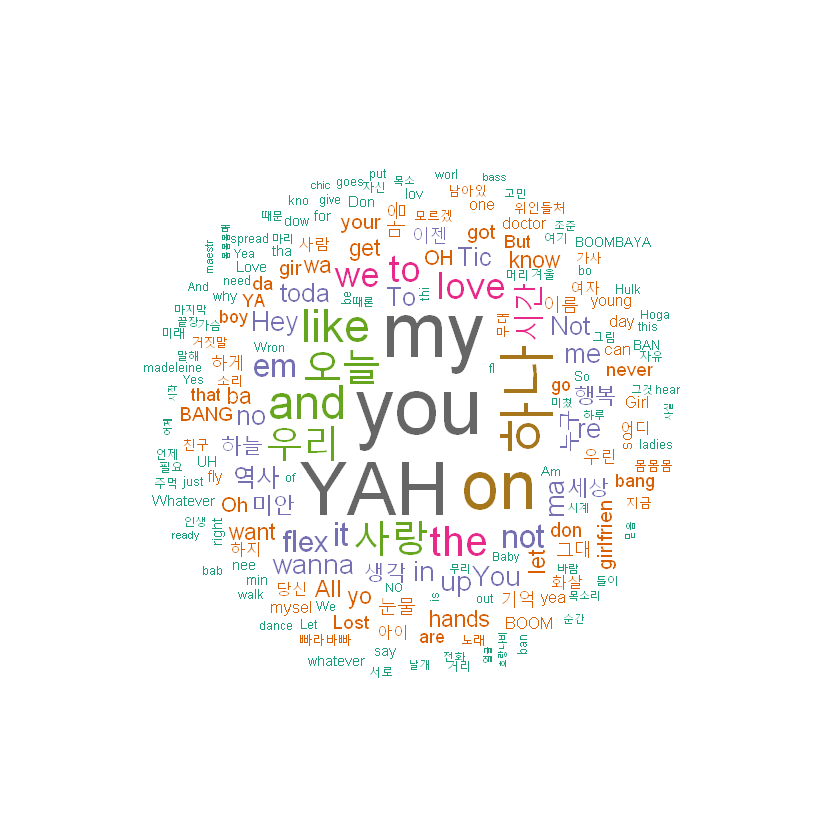

In [10]:
# 워드 클라우드 생성 
set.seed(1234)                    # 난수 고정
wordcloud(words = df_word$word,   # 단어
           freq = df_word$freq,   # 빈도
           min.freq = 2,          # 최소 단어 빈도
           max.words = 200,       # 표현 단어 수
           random.order = F,      # 고빈도 단어 중앙 배치
           rot.per = .1,          # 회전 단어 비율
           scale = c(4, 0.3),     # 단어 크기 범위
           colors = pal)          # 색깔 목록
 

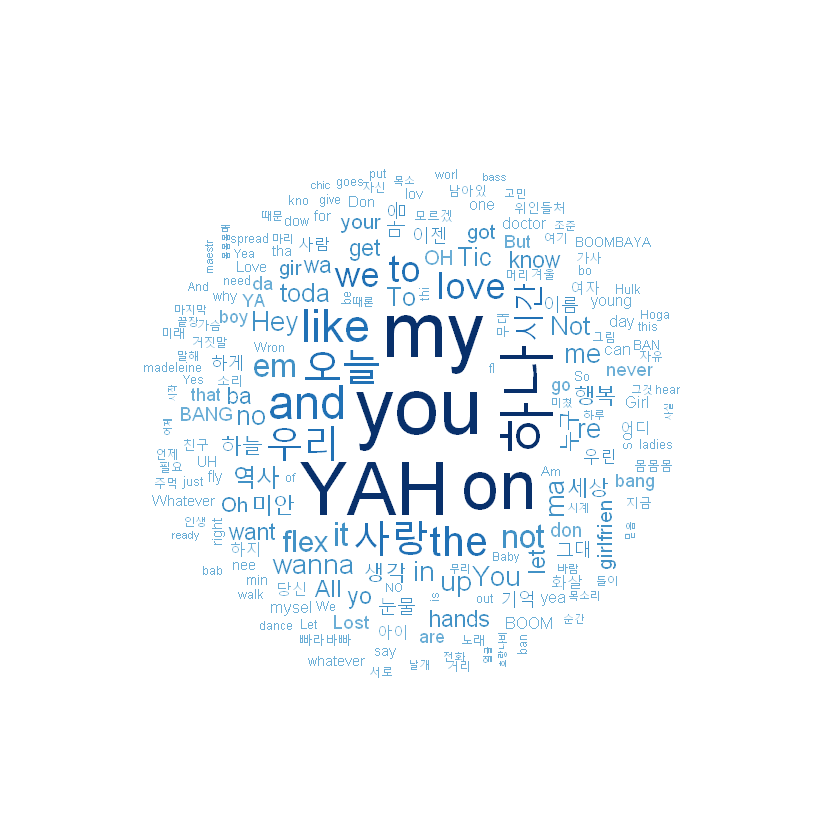

In [11]:
# 단어 색상 바꾸기 
pal <- brewer.pal(9,"Blues")[5:9]  # 색상 목록 생성
set.seed(1234)                     # 난수 고정
 
 
wordcloud(words = df_word$word,    # 단어
           freq = df_word$freq,     # 빈도
           min.freq = 2,            # 최소 단어 빈도
           max.words = 200,         # 표현 단어 수
           random.order = F,        # 고빈도 단어 중앙 배치
           rot.per = .1,            # 회전 단어 비율
           scale = c(4, 0.3),       # 단어 크기 범위
           colors = pal)            # 색상 목록

## 국정원 트윗 텍스트 마이닝

- 국정원 계정 트윗 데이터
    - 국정원 대선 개입 사실이 밝혀져 논란이 됐던 2013년 6월, 독립 언론 뉴스타파가 인터넷을 통해 공개 
    - 국정원 계정으로 작성된 3,744개 트윗 

In [13]:
# 데이터 준비하기 
# 데이터 로드
twitter <- read.csv("./twitter.csv",
                     header = T,
                     stringsAsFactors = F,
                     fileEncoding = "UTF-8") 
 
# 변수명 수정
twitter <- rename(twitter,
                   no = 번호,
                   id = 계정이름,
                   date = 작성일,
                   tw = 내용) 
 
# 특수문자 제거
twitter$tw <- str_replace_all(twitter$tw, "\\W", " ") 

In [14]:
head(twitter$tw) 

[1] "민주당의 ISD관련 주장이 전부 거짓으로 속속 드러나고있다  미국이 ISD를 장악하고 있다고 주장하지만 중재인 123명 가운데 미국인은 10명뿐이라고 한다 "                                                                               
[2] "말로만  미제타도   사실은  미제환장   김정일 운구차가 링컨 컨티넬탈이던데 북한의 독재자나 우리나라 종북들이나 겉으로는 노동자  서민을 대변한다면서 고급 외제차  아이팟에 자식들 미국 유학에 환장하는 위선자들인거죠"            
[3] "한나라당이 보수를 버린다네요 뭔가착각하는모냥인에 국민들이보수를싫어하는게 아니라뻘짓거리하는분들을싫어하는겁니다야당이진보어쩌고저쩌고한다고해서그들을조아한다고생각하면대착각"                                                
[4] "FTA를 대하는 현명한 자세  사실 자유주의 경제의 가장 큰 수해자는 한국이죠  농어업분야 피해를 줄이는 정부대안을 최대한  보완하고 일자리 창출 등 실익을 최대화해 나가는게 현실적인 대처자세일듯 "                                  
[5] "곽노현씨 갈수록 가관입니다  뇌물질에 아들 병역 의혹까지  도대체 아이들이 뮐 보고 배우겠습니까  이래도 자리 연연하시겠습니까 "                                                                                                   
[6] "과거 집권시 한미FTA를 적극 추진하던 세력이 이제 집권하면 폐기하겠다고 주장합니다  어이없어 말도 안 나오네요  표만 얻을 수 있다면 국가 안보나 경제가 어떻게 되든 상관없다는 무책임한 행태들  우리 정치의 후진성을 드러내는 거죠 "

In [15]:
# 단어 빈도표 만들기 
# 트윗에서 명사추출
nouns <- extractNoun(twitter$tw) 
 
# 추출한 명사 list 를 문자열 벡터로 변환 , 단어별 빈도표 생성
wordcount <- table(unlist(nouns)) 
 
# 데이터 프레임으로 변환
df_word <- as.data.frame(wordcount, stringsAsFactors = F) 
 
# 변수명 수정
df_word <- rename(df_word,
                  word = Var1,
                  freq = Freq) 

In [16]:
#두 글자 이상으로 된 단어 추출, 빈도 상위 20개 단어 추출 
# 두 글자 이상 단어만 추출
df_word <- filter(df_word, nchar(word) >= 2) 
 
# 상위 20 개 추출
top20 <- df_word %>%
    arrange(desc(freq)) %>%
    head(20) 

In [17]:
top20

,word,freq
,<chr>,<int>
1,종북,2431
2,북한,2216
3,세력,1162
4,좌파,829
5,대한민국,804
6,우리,780
7,들이,566
8,국민,550
9,친북,430


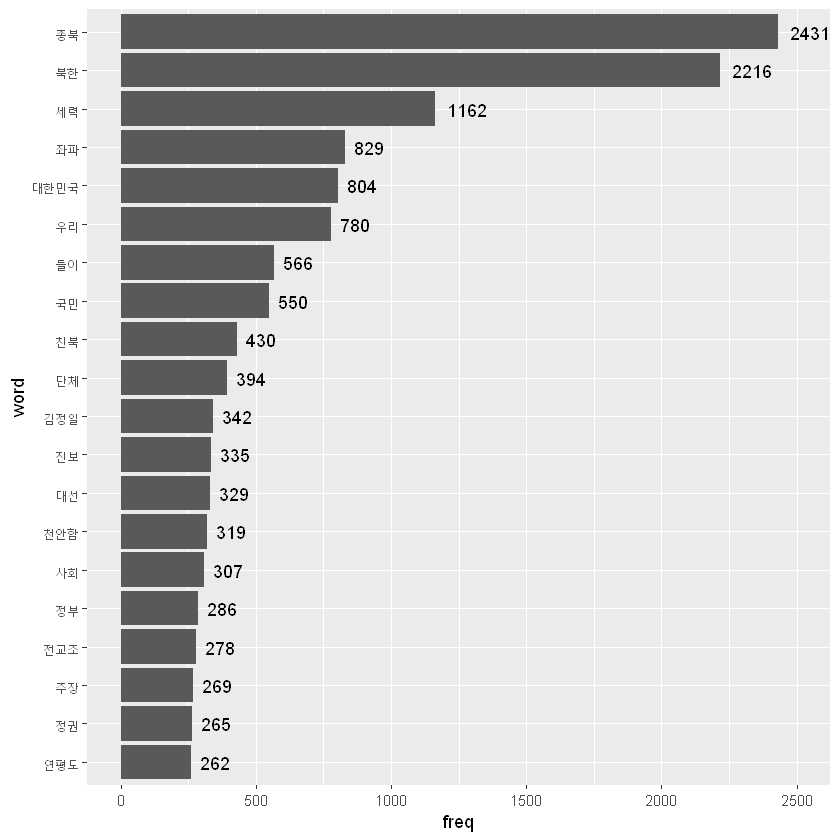

In [18]:
# 단어 빈도 막대 그래프 만들기 
library(ggplot2) 
 
order <- arrange(top20, freq)$word                # 빈도 순서 변수 생성
 
ggplot(data = top20, aes(x = word, y = freq)) +
    ylim(0, 2500) +   geom_col() +   coord_flip() +
    scale_x_discrete(limit = order) +              # 빈도 순서 변수 기준 막대 정렬
    geom_text(aes(label = freq), hjust = -0.3)     # 빈도 표시

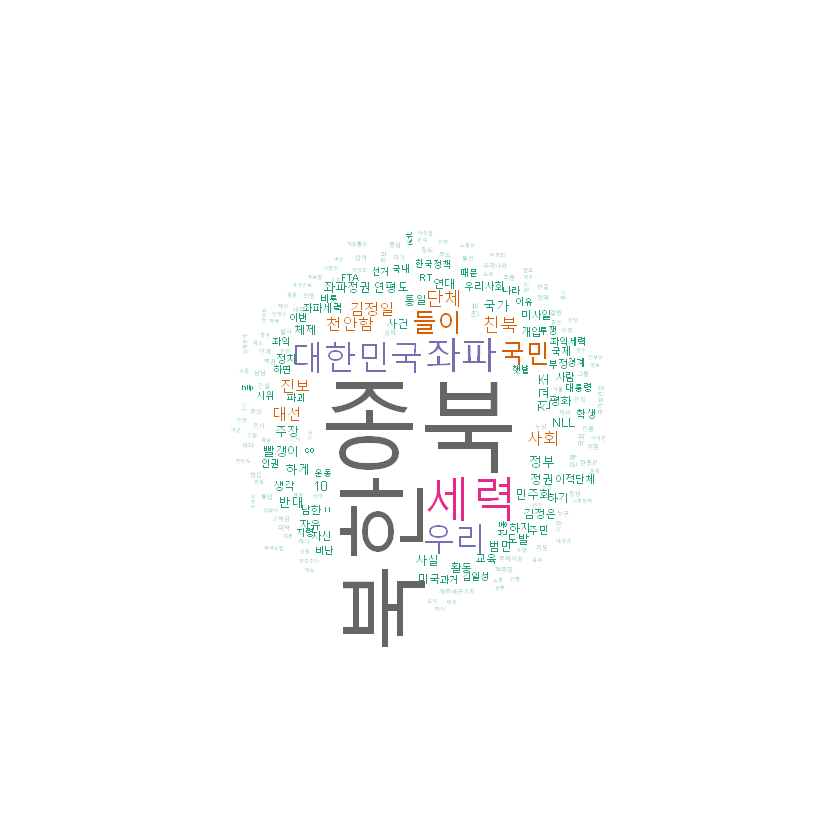

In [19]:
# 워드 클라우드 만들기 
pal <- brewer.pal(8,"Dark2")       # 색상 목록 생성
set.seed(1234)                     # 난수 고정
 
 
wordcloud(words = df_word$word,    # 단어
           freq = df_word$freq,     # 빈도
           min.freq = 10,           # 최소 단어 빈도
           max.words = 200,         # 표현 단어 수
           random.order = F,        # 고빈도 단어 중앙 배치
           rot.per = .1,            # 회전 단어 비율
           scale = c(6, 0.2),       # 단어 크기 범위
           colors = pal)            # 색상 목록

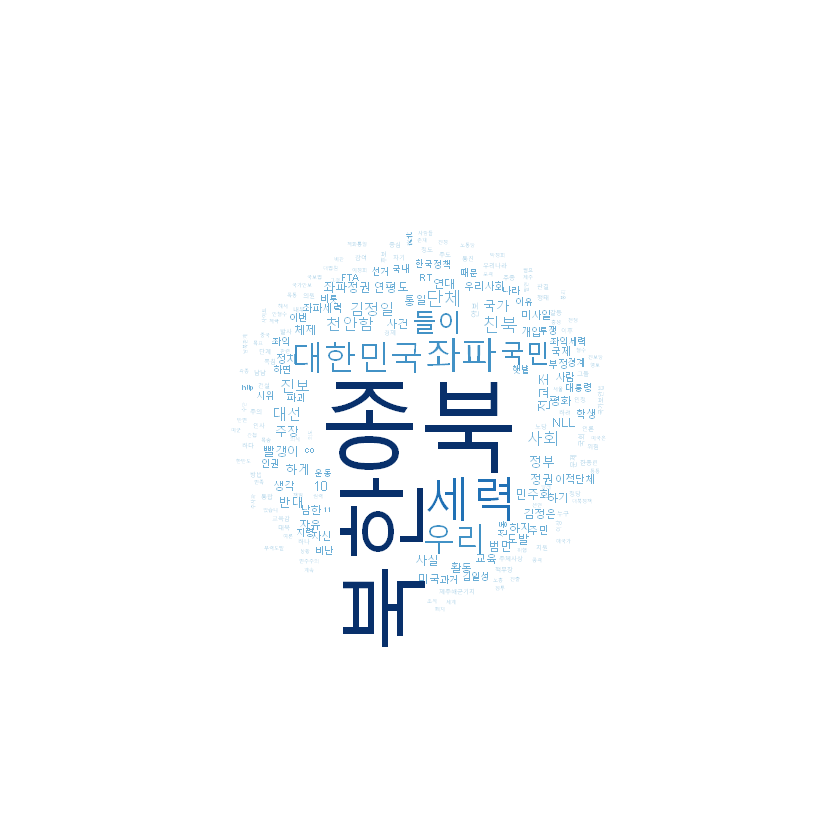

In [20]:
# 색깔 바꾸기 
pal <- brewer.pal(9,"Blues")[5:9]  # 색상 목록 생성
set.seed(1234)                     # 난수 고정
 
 
wordcloud(words = df_word$word,     # 단어
           freq = df_word$freq,     # 빈도
           min.freq = 10,           # 최소 단어 빈도
           max.words = 200,         # 표현 단어 수
           random.order = F,        # 고빈도 단어 중앙 배치
           rot.per = .1,            # 회전 단어 비율
           scale = c(6, 0.2),       # 단어 크기 범위
           colors = pal)            # 색상 목록
 